In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('.')
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

import incense
from incense import ExperimentLoader
from cycler import cycler


## Finding experiments

To use `incense` we first have to instantiate an experiment loader that will enable us to query the database for specific runs.

In [3]:
loader = ExperimentLoader(
    mongo_uri="mongodb://localhost:27017", 
    db_name='sacred'
)

In [4]:
query = {"$and": [
            {"config.autoencoder_type": "Over_dim"},
           
        ]}
experiments=loader.find(query)

In [5]:
experiments

QuerySet([Experiment(id=1, name=autoencoder_test), Experiment(id=2, name=autoencoder_test), Experiment(id=3, name=autoencoder_test), Experiment(id=4, name=autoencoder_test), Experiment(id=5, name=autoencoder_test), Experiment(id=6, name=autoencoder_test), Experiment(id=7, name=autoencoder_test), Experiment(id=8, name=autoencoder_test), Experiment(id=66, name=autoencoder_test), Experiment(id=67, name=autoencoder_test), Experiment(id=68, name=autoencoder_test), Experiment(id=69, name=autoencoder_test)])

In [6]:
experiments[0].config

pmap({'iteration': False, 'seed': 677719408, 'targets_type': '10_Targets', 'epochs': 250, 'autoencoder_type': 'Over_dim', 'batch_size': 256})

In [ ]:
experiments.project(on=["config.targets_type","config.targets_type", "config.iteration", "config.autoencoder_type", "config.batch_size"])

In [8]:
#experiments=experiments[0:6]
experiments

QuerySet([Experiment(id=1, name=autoencoder_test), Experiment(id=2, name=autoencoder_test), Experiment(id=3, name=autoencoder_test), Experiment(id=4, name=autoencoder_test), Experiment(id=5, name=autoencoder_test), Experiment(id=6, name=autoencoder_test), Experiment(id=7, name=autoencoder_test), Experiment(id=8, name=autoencoder_test), Experiment(id=66, name=autoencoder_test), Experiment(id=67, name=autoencoder_test), Experiment(id=68, name=autoencoder_test), Experiment(id=69, name=autoencoder_test)])

In [9]:
def print_imm(imgs,name):
    n = len(imgs[0]) # how many digits we will display
    if name:
        plt.figure(figsize=(2,0.5))
        plt.text(0.1, 0.1, name, fontsize=12) 
        plt.show()
    plt.figure(figsize=(2*len(imgs[0]), 2 * len(imgs) + 2))
    for i in range(n):
        for j in range(len(imgs)):
            # display original
            ax = plt.subplot(len(imgs), n, i + 1 + j * n)
            
            plt.imshow(imgs[j][i].reshape(28, 28))
            
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

    plt.show()

In [11]:
name_list=['predictions_df_0','predictions_df_10','predictions_df_20','predictions_df_30','predictions_df_40','predictions_df_50','predictions_df_60','predictions_df_70','predictions_df_80','predictions_df_90','predictions_df_100']
#name_list=['predictions_df_0','predictions_df_10','predictions_df_20']

In [12]:
#df = pd.concat([pd.read_pickle(exp.artifacts['predictions_df_0'].as_type(incense.artifact.PickleArtifact).file,compression='gzip')['predictions'] for exp in experiments],axis=1,keys=[str(exp.id) for exp in experiments])
#df

predictions_df_0


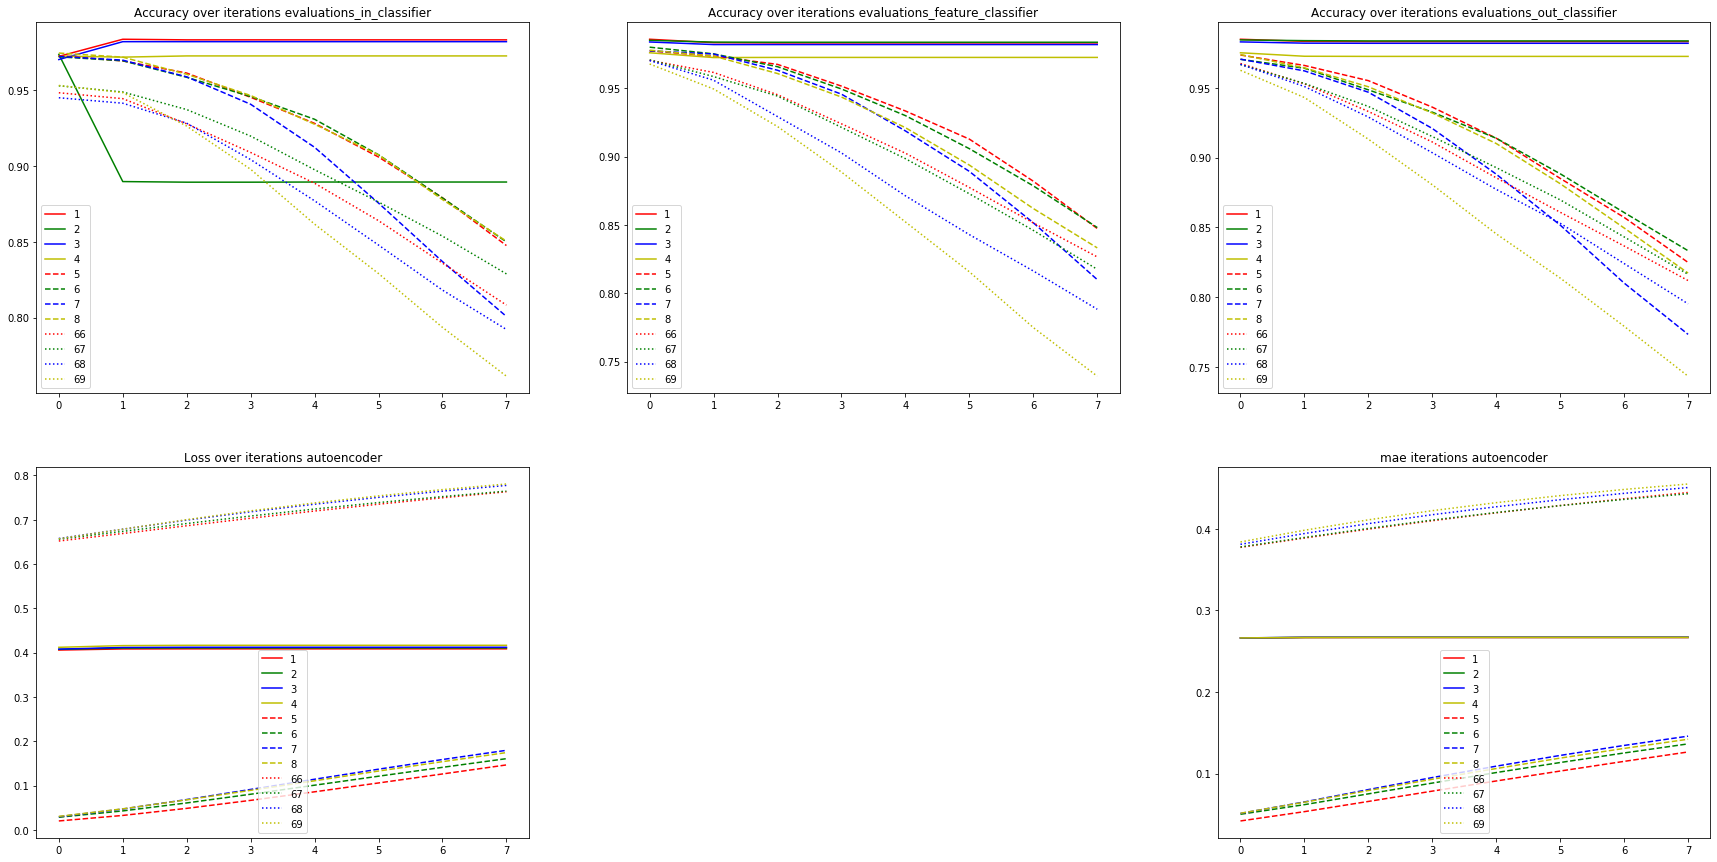

predictions_df_10


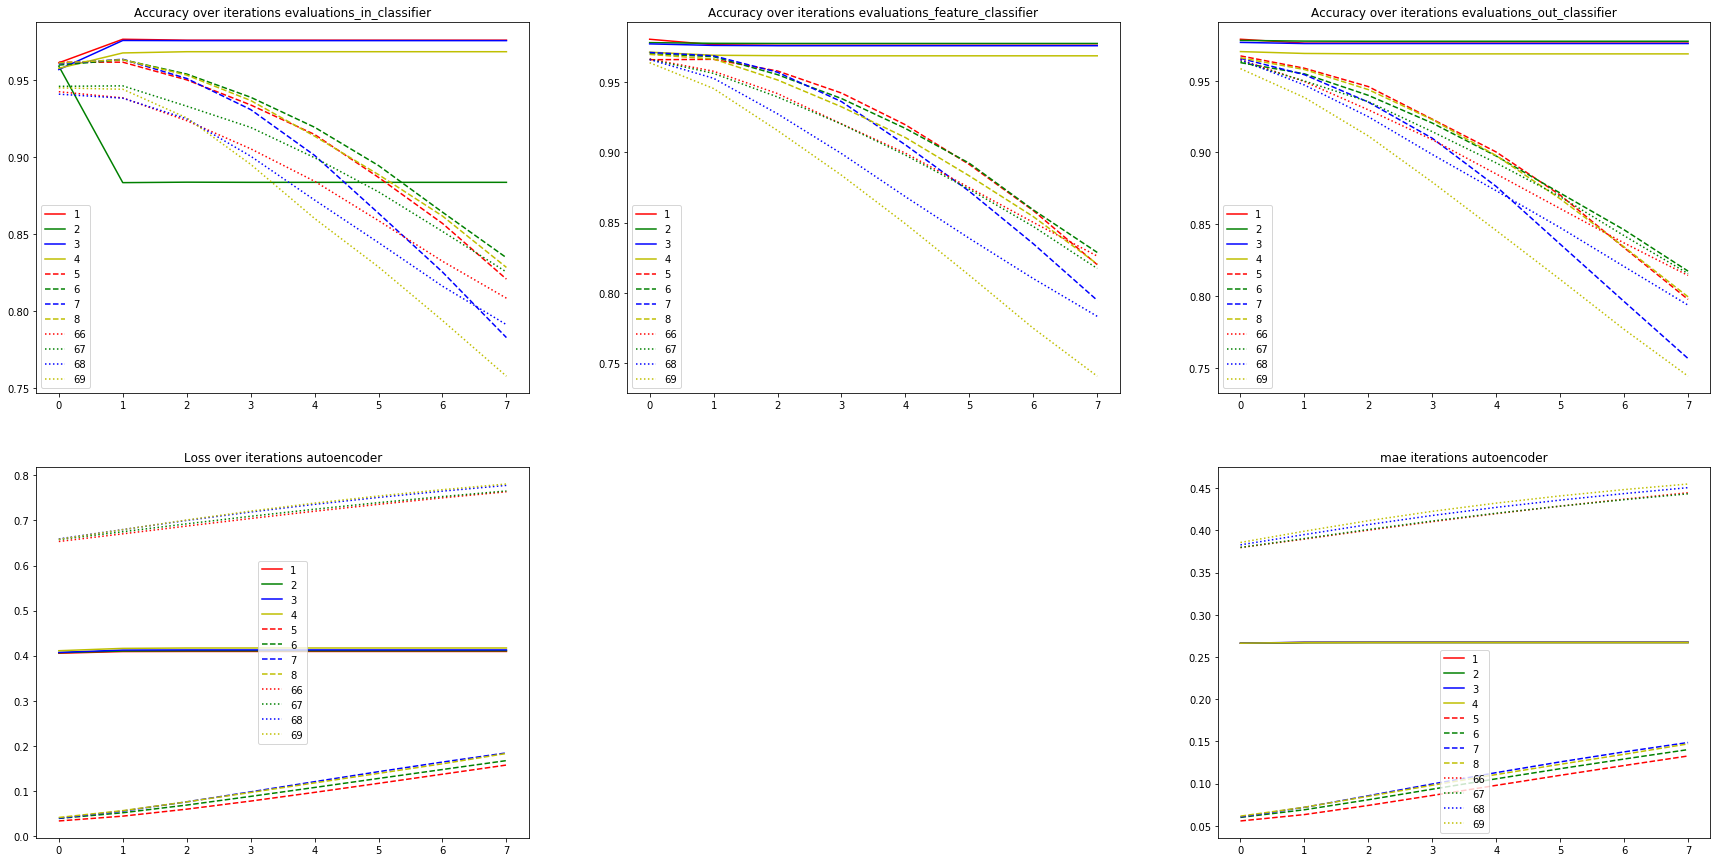

predictions_df_20


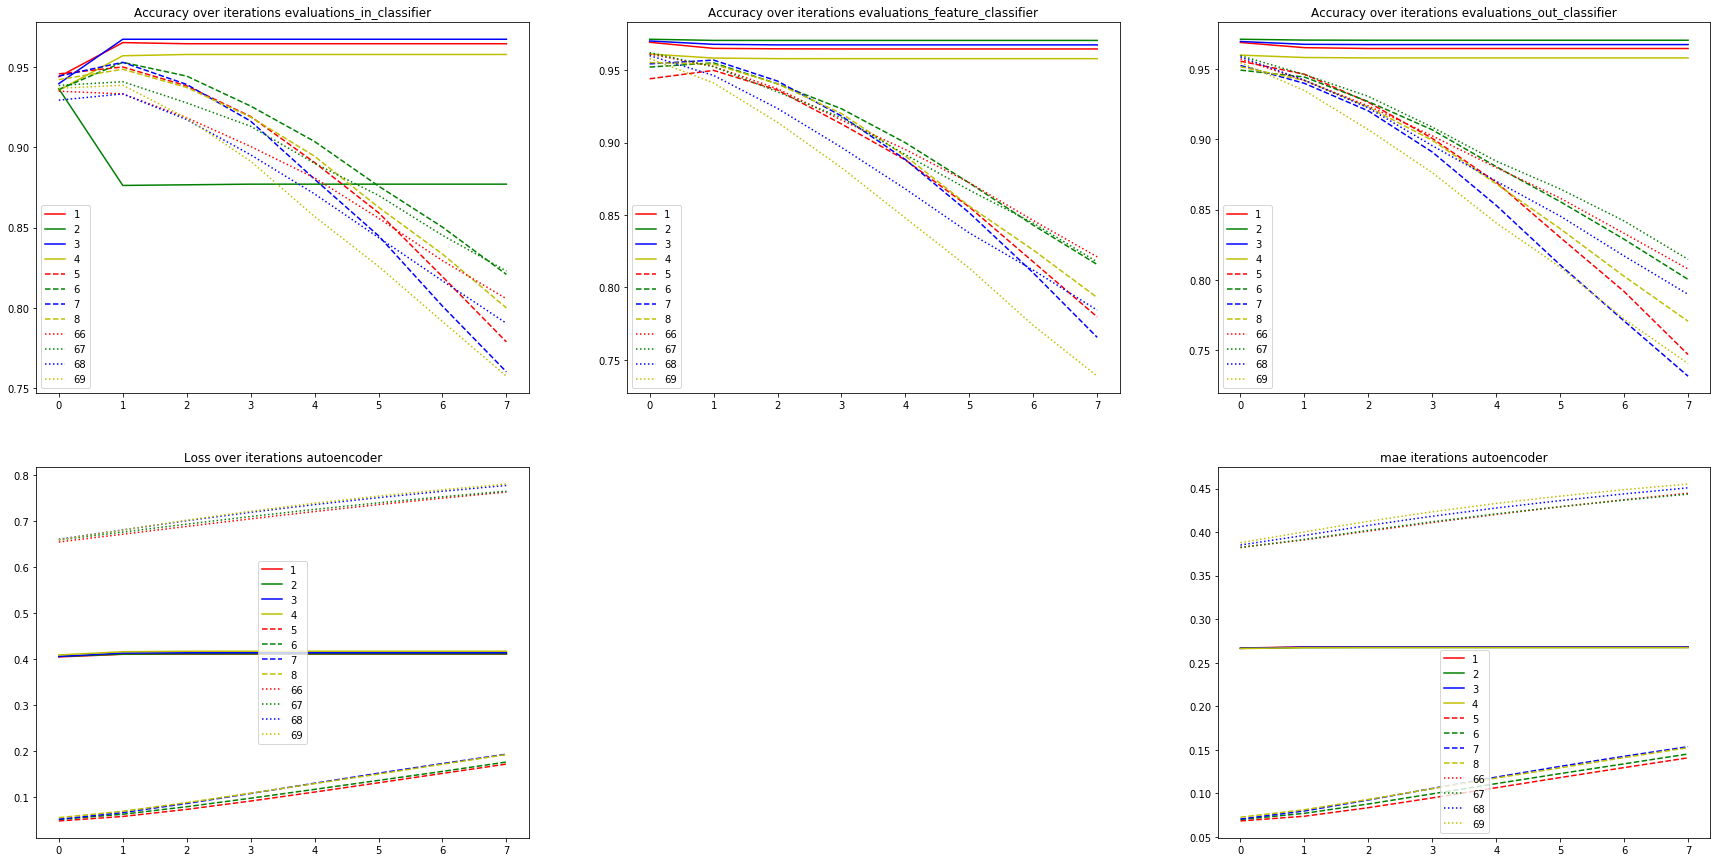

In [ ]:
for index in name_list:
    compare(index)